Interactive web environment:
!pip install flask plotly as pandas numpy
Flask is a web framework for Python that allows building web application quickly
Use Plotly library for creating interactive plots and charts


#Extract columns function to dynamically process existing data

import pandas as pd

def load_and_extract_columns(filepath):
    # Read the CSV file
    df = pd.read_csv(file_path, index_col=0).transpose()

    # Define the categories of columns
    involvement_keywords = ['Funding', 'Application-Oriented', 'Demos', 'Industrial Collaborations', 
                            'System Maturity', 'Number of Members', 'Academic Collaborations']
    
    industry_keywords = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                         'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']
    
    # Extract columns based on keywords
    involvement_columns = [col for col in df.columns if any(keyword in col for keyword in involvement_keywords)]
    industry_columns = [col for col in df.columns if any(keyword in col for keyword in industry_keywords)]
    complementary_columns = [col for col in df.columns if col not in industry_columns]
    
    return df, involvement_columns, industry_columns, complementary_columns

# Example usage
file_path = 'data/team_stats.csv'
df, involvement_columns, industry_columns, complementary_columns = load_and_extract_columns(file_path)

print("Involvement Columns:", involvement_columns)
print("Industry Columns:", industry_columns)
print("Complementary Columns:", complementary_columns)


In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

"""
    Loads and preprocesses the team activity data from a CSV file.

    Parameters:
    - file_path (str): The path to the CSV file containing the team activity data.

    Returns:
    - df (DataFrame): A preprocessed DataFrame with involvement levels converted to numerical values.
    """



# Load and preprocess the data
def load_and_preprocess_data(file_path):
    data = pd.read_csv(filepath, index_col=0).transpose()
    weights = {'Strong': 3, 'Good': 2, 'Average': 1, 'None': 0}
    
    # Involvement level columns

    
    involvement_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                           'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 
                           'Funding', 'Application-Oriented', 'Number of Members', 
                           'Academic Collaborations', 'System Maturity', 'Demos', 'Industrial Collaborations']
    
    #Iterate through each column, map qualitative values to numerical values using the 'weights' dictionary, and fill missing values with 0
    for column in involvement_columns:
        if column in data.columns:
            data[column] = data[column].map(weights).fillna(0)
    
    return data

In [30]:
# Path to the CSV file
filepath = 'data/team_stats.csv'

# Load and preprocess the data
df = load_and_preprocess_data(filepath)

In [31]:
df.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,1,2.0,2.0,2.0,1.0
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,3,3.0,3.0,3.0,3.0
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,3.0,3.0,2,2.0,2.0,2.0,1.0
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0,3.0,3.0,2,3.0,3.0,3.0,3.0
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,2.0,3,0.0,3.0,3.0,0.0


In [32]:
"""
    Calculates a pairwise similarity matrix for the teams based on their industry involvement levels.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    
    Returns:
    - similarity_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.
    """

def calculate_pairwise_similarity(data):
    
    industry_cols = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']
    
  # Initialize a similarity matrix with zeros
    sim_matrix = np.zeros((len(data), len(data)))
    
    # Scoring matrix for pairwise comparisons
    scoring_matrix = np.array([
        [0, 1, 2, 3],  # None
        [1, 2, 3, 4],  # Average
        [2, 3, 4, 5],  # Good
        [3, 4, 5, 6]   # Strong
    ])
    
    # Map involvement levels to indices
    involvement_index = {'None': 0, 'Average': 1, 'Good': 2, 'Strong': 3}
    
    # Reverse the numerical mapping for correct index lookups
    reverse_weights = {0: 'None', 1: 'Average', 2: 'Good', 3: 'Strong'}
    
    # Calculate pairwise similarity scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                similarity_score = 0
                for col in industry_cols:
                    level_i = reverse_weights[data[col].iloc[i]]
                    level_j = reverse_weights[data[col].iloc[j]]
                    index_i = involvement_index[level_i]
                    index_j = involvement_index[level_j]
                    similarity_score += scoring_matrix[index_i][index_j]
                sim_matrix[i][j] = similarity_score
    
    return sim_matrix
    


In [33]:
similarity_matrix = calculate_pairwise_similarity(df)
similarity_matrix

array([[ 0., 21., 26., 28., 27., 21., 22., 21., 19., 22., 20., 23., 21.,
        23.],
       [21.,  0., 21., 23., 22., 16., 17., 16., 14., 17., 15., 18., 16.,
        18.],
       [26., 21.,  0., 28., 27., 21., 22., 21., 19., 22., 20., 23., 21.,
        23.],
       [28., 23., 28.,  0., 29., 23., 24., 23., 21., 24., 22., 25., 23.,
        25.],
       [27., 22., 27., 29.,  0., 22., 23., 22., 20., 23., 21., 24., 22.,
        24.],
       [21., 16., 21., 23., 22.,  0., 17., 16., 14., 17., 15., 18., 16.,
        18.],
       [22., 17., 22., 24., 23., 17.,  0., 17., 15., 18., 16., 19., 17.,
        19.],
       [21., 16., 21., 23., 22., 16., 17.,  0., 14., 17., 15., 18., 16.,
        18.],
       [19., 14., 19., 21., 20., 14., 15., 14.,  0., 15., 13., 16., 14.,
        16.],
       [22., 17., 22., 24., 23., 17., 18., 17., 15.,  0., 16., 19., 17.,
        19.],
       [20., 15., 20., 22., 21., 15., 16., 15., 13., 16.,  0., 17., 15.,
        17.],
       [23., 18., 23., 25., 24., 18., 19., 

In [34]:
# Step 3: Calculate complementary scores
def calculate_complementary_scores(data):
    """
    Calculates a pairwise complementary score matrix for the teams based on their complementary factors.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    
    Returns:
    - complementary_matrix (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    """
    comp_cols = ['Number of Members', 'Application-Oriented', 'Academic Collaborations', 
                      'System Maturity', 'Demos', 'Industrial Collaborations']

    # Verify the complementary columns exist in the data
    data = data[comp_cols]
    
    # Print the shape of the data to debug
    print(f"Shape of the filtered data: {data.shape}")
    
    # Initialize a complementary score matrix with zeros
    comp_matrix = np.zeros((len(data), len(data)))
    
    # Calculate pairwise complementary scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                complementary_score = 0
                for col in comp_cols:
                    # Sum the absolute differences in complementary factors
                    complementary_score += abs(data[col].iloc[i] - data[col].iloc[j])
                comp_matrix[i][j] = complementary_score
    
    # Invert the scores to make them comparable with similarity scores (lower means more complementary)
    max_score = np.max(comp_matrix)
    comp_matrix = max_score - comp_matrix
    
    return comp_matrix

In [35]:

comp_scores = calculate_complementary_scores(df)
print("Complementary Scores Matrix:")
print(comp_scores)

Shape of the filtered data: (14, 6)
Complementary Scores Matrix:
[[17.  9. 15. 10. 10. 13. 12. 16. 14. 12. 12. 13.  8. 13.]
 [ 9. 17. 11. 16. 10. 13. 12.  8.  8.  8. 12.  9.  0.  9.]
 [15. 11. 17. 12. 10. 13. 14. 14. 12. 14. 14. 13.  6. 13.]
 [10. 16. 12. 17.  9. 14. 11.  9.  9.  9. 13. 10.  1.  8.]
 [10. 10. 10.  9. 17.  8. 11. 11.  9.  9. 13.  8.  7. 14.]
 [13. 13. 13. 14.  8. 17. 12. 12. 12. 10. 12. 11.  4.  9.]
 [12. 12. 14. 11. 11. 12. 17. 13.  9. 13. 13. 10.  5. 14.]
 [16.  8. 14.  9. 11. 12. 13. 17. 13. 13. 13. 12.  9. 14.]
 [14.  8. 12.  9.  9. 12.  9. 13. 17.  9.  9. 14.  9. 12.]
 [12.  8. 14.  9.  9. 10. 13. 13.  9. 17. 13. 12.  9. 12.]
 [12. 12. 14. 13. 13. 12. 13. 13.  9. 13. 17. 10.  5. 12.]
 [13.  9. 13. 10.  8. 11. 10. 12. 14. 12. 10. 17.  8. 11.]
 [ 8.  0.  6.  1.  7.  4.  5.  9.  9.  9.  5.  8. 17.  8.]
 [13.  9. 13.  8. 14.  9. 14. 14. 12. 12. 12. 11.  8. 17.]]


In [36]:
complementary_matrix = calculate_complementary_scores(df)
complementary_matrix

Shape of the filtered data: (14, 6)


array([[17.,  9., 15., 10., 10., 13., 12., 16., 14., 12., 12., 13.,  8.,
        13.],
       [ 9., 17., 11., 16., 10., 13., 12.,  8.,  8.,  8., 12.,  9.,  0.,
         9.],
       [15., 11., 17., 12., 10., 13., 14., 14., 12., 14., 14., 13.,  6.,
        13.],
       [10., 16., 12., 17.,  9., 14., 11.,  9.,  9.,  9., 13., 10.,  1.,
         8.],
       [10., 10., 10.,  9., 17.,  8., 11., 11.,  9.,  9., 13.,  8.,  7.,
        14.],
       [13., 13., 13., 14.,  8., 17., 12., 12., 12., 10., 12., 11.,  4.,
         9.],
       [12., 12., 14., 11., 11., 12., 17., 13.,  9., 13., 13., 10.,  5.,
        14.],
       [16.,  8., 14.,  9., 11., 12., 13., 17., 13., 13., 13., 12.,  9.,
        14.],
       [14.,  8., 12.,  9.,  9., 12.,  9., 13., 17.,  9.,  9., 14.,  9.,
        12.],
       [12.,  8., 14.,  9.,  9., 10., 13., 13.,  9., 17., 13., 12.,  9.,
        12.],
       [12., 12., 14., 13., 13., 12., 13., 13.,  9., 13., 17., 10.,  5.,
        12.],
       [13.,  9., 13., 10.,  8., 11., 10., 

In [48]:
def combine_scores(industry_similarity, compl_scores, alpha=0.5):
    """
    Combines the industry similarity scores and complementary scores into a single matrix using a weighted average.
    
    Parameters:
    - industry_similarity (ndarray): A 2D NumPy array representing the pairwise industry similarity scores between teams.
    - complementary_scores (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    - alpha (float): A weighting factor to balance the industry similarity and complementary scores. 
                     Should be between 0 and 1. Default is 0.5.
    
    Returns:
    - combined_matrix (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    """
    # Ensure alpha is between 0 and 1
    if not (0 <= alpha <= 1):
        raise ValueError("alpha should be between 0 and 1")

    # Combine the industry similarity and complementary scores using a weighted average
    combined_matrix = alpha * industry_similarity + (1 - alpha) * compl_scores
    
    return combined_matrix

In [38]:
combine_scores(similarity_matrix, complementary_matrix)

array([[ 8.5, 15. , 20.5, 19. , 18.5, 17. , 17. , 18.5, 16.5, 17. , 16. ,
        18. , 14.5, 18. ],
       [15. ,  8.5, 16. , 19.5, 16. , 14.5, 14.5, 12. , 11. , 12.5, 13.5,
        13.5,  8. , 13.5],
       [20.5, 16. ,  8.5, 20. , 18.5, 17. , 18. , 17.5, 15.5, 18. , 17. ,
        18. , 13.5, 18. ],
       [19. , 19.5, 20. ,  8.5, 19. , 18.5, 17.5, 16. , 15. , 16.5, 17.5,
        17.5, 12. , 16.5],
       [18.5, 16. , 18.5, 19. ,  8.5, 15. , 17. , 16.5, 14.5, 16. , 17. ,
        16. , 14.5, 19. ],
       [17. , 14.5, 17. , 18.5, 15. ,  8.5, 14.5, 14. , 13. , 13.5, 13.5,
        14.5, 10. , 13.5],
       [17. , 14.5, 18. , 17.5, 17. , 14.5,  8.5, 15. , 12. , 15.5, 14.5,
        14.5, 11. , 16.5],
       [18.5, 12. , 17.5, 16. , 16.5, 14. , 15. ,  8.5, 13.5, 15. , 14. ,
        15. , 12.5, 16. ],
       [16.5, 11. , 15.5, 15. , 14.5, 13. , 12. , 13.5,  8.5, 12. , 11. ,
        15. , 11.5, 14. ],
       [17. , 12.5, 18. , 16.5, 16. , 13.5, 15.5, 15. , 12. ,  8.5, 14.5,
        15.5, 13.

In [39]:
# Step 3: Apply clustering based on similarity matrix
def apply_clustering(sim_matrix, n_clusters):
    """
    Applies agglomerative clustering on the given similarity matrix.
    
    Parameters:
    - sim_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.
    - num_clusters (int): The number of clusters to form.
    
    Returns:
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    """
    # Convert similarity matrix to a distance matrix
    distance_matrix = 1 - (sim_matrix / np.max(sim_matrix))
    
    # Apply agglomerative clustering using the precomputed distance matrix
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric ='precomputed', linkage='complete')
    labels = clustering.fit_predict(distance_matrix)
    
    return labels


In [40]:
# Step 4: Calculate the average ratings for each feature within each cluster
def calculate_cluster_averages(df, labels):
    """
    Calculates the average ratings for each feature within each cluster.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    
    Returns:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    """
    # Assign cluster labels to the DataFrame
    df['cluster'] = labels
    
    # Calculate the average ratings for each feature within each cluster
    cluster_averages = df.groupby('cluster').mean().drop(columns='cluster', errors='ignore')
    
    return cluster_averages

In [41]:
# Step 5: Identify common strengths in each cluster
def identify_common_strengths(cluster_averages):
    """
    Identifies common strengths in each cluster by checking if the average rating for a feature in a cluster 
    is above a certain threshold.
    
    Parameters:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    
    Returns:
    - common_strengths (DataFrame): A DataFrame indicating whether each feature is a common strength in each cluster.
    """
    # Identify common strengths by checking if the average rating is >= 1.5
    common_strengths = (cluster_averages >= 1.5)
    
    return common_strengths


In [42]:
# Define the feature weights (if custom scoring is needed)
feature_weights = {
    'Security': 3,
    'Humanities': 3,
    'Nat. Sci': 3,
    'Health': 3,
    'AI Ethics': 3,
    'Big Data': 3,
    'Robotics': 3,
    'Documents': 3,
    'Multimedia': 3,
    'NLP': 3,
    'KRR': 3,
    'Graphs': 3,
    'DL/ML': 3,
    'Number of Members': 1,
    'Application-Oriented': 2,
    'Academic Collaborations': 2,
    'System Maturity': 2,
    'Demos': 2,
    'Industrial Collaborations': 2
}

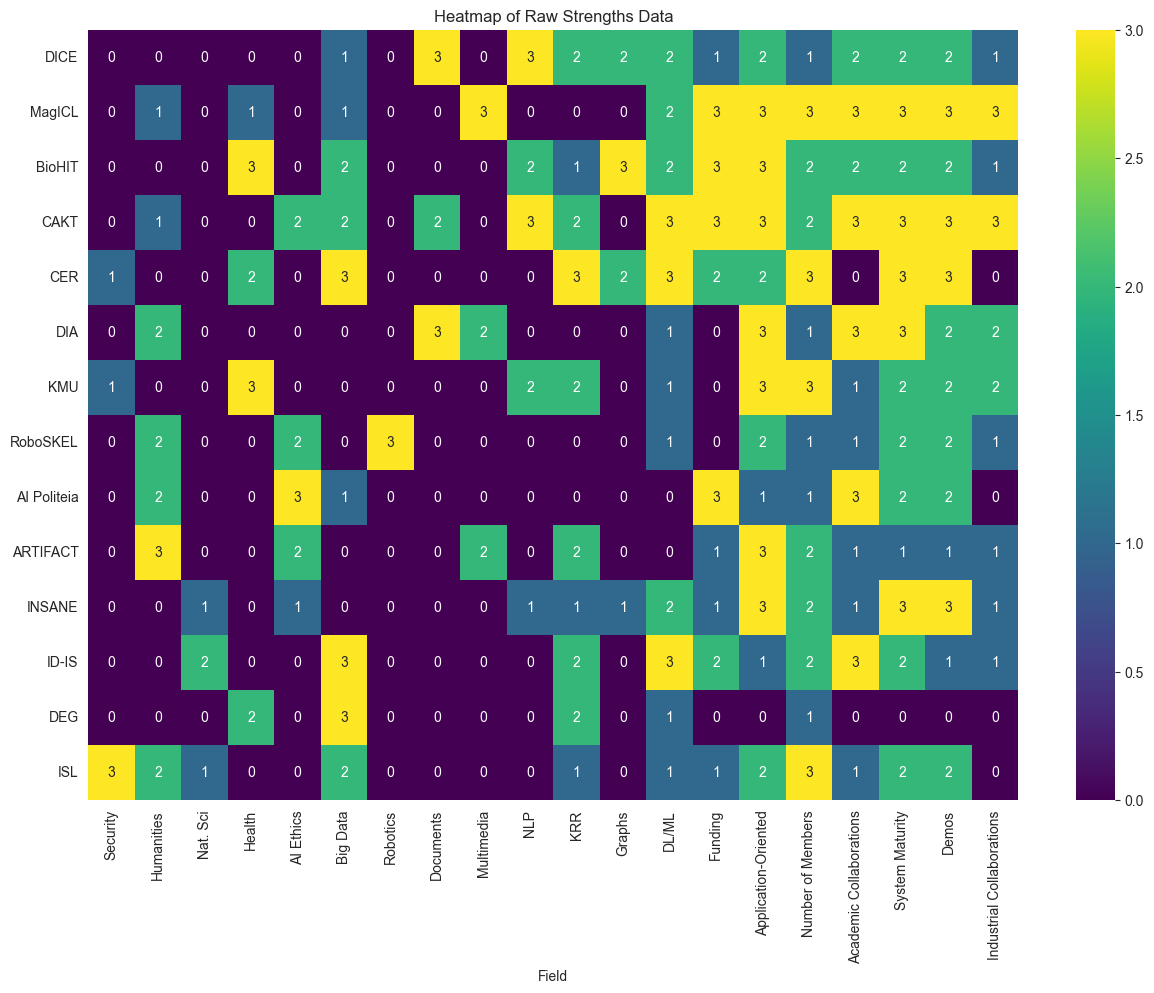

In [210]:
# Plot heatmap of the original strengths data
plt.figure(figsize=(15, 10))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of Raw Strengths Data')
plt.show()


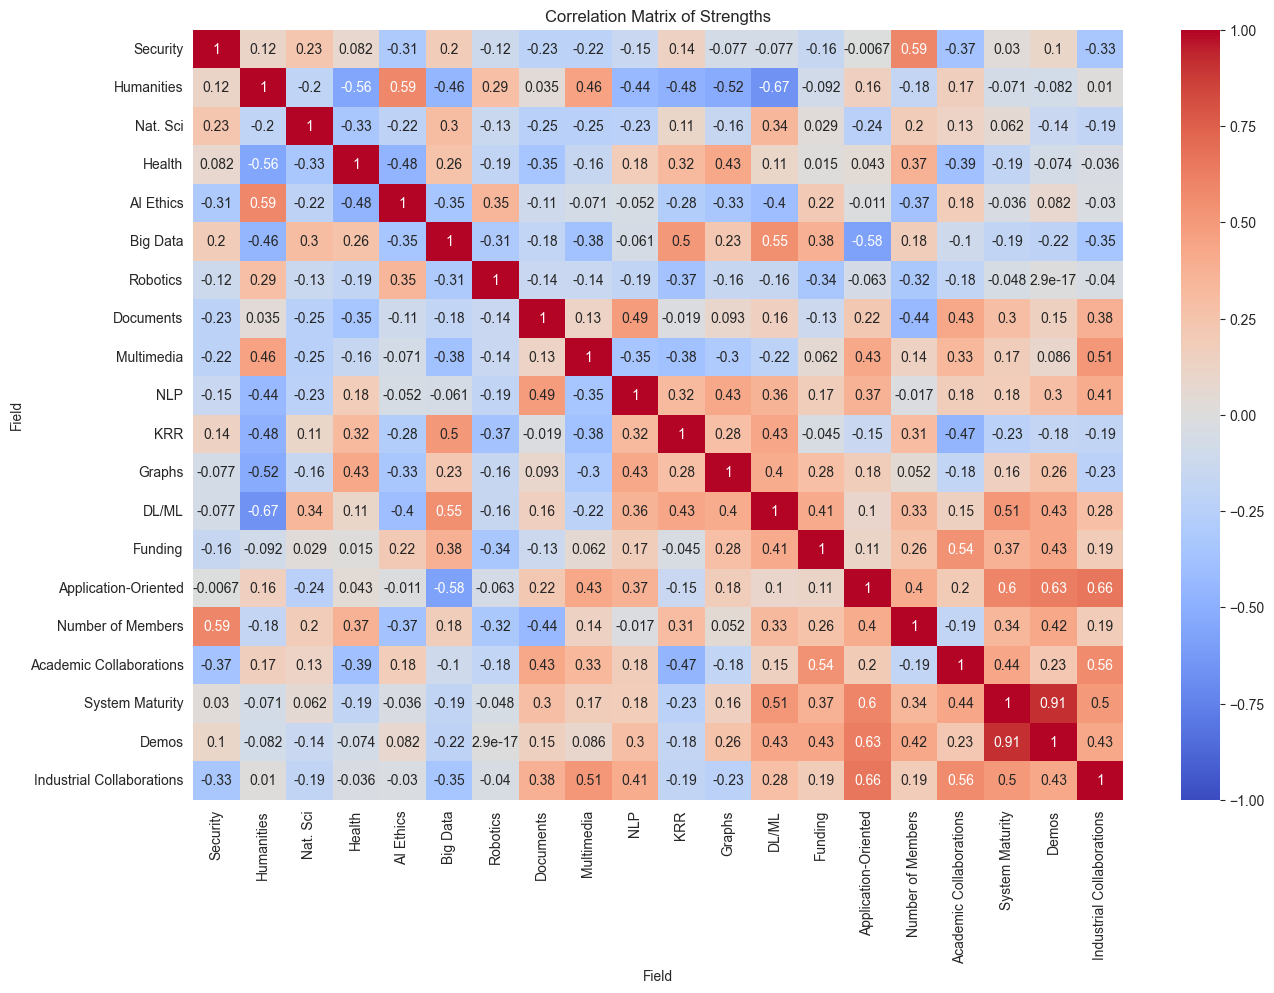

In [43]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Strengths')
plt.show()


In [49]:
# Calculate pairwise similarity scores
industry_scores = calculate_pairwise_similarity(df)

complementary_scores = calculate_complementary_scores(df) #FIXME

combined_scores = combine_scores(industry_scores,complementary_scores, alpha=0.5)


Shape of the filtered data: (14, 6)


In [50]:
def similarity_visual(scores):
    """
    Visualizes the clustering results based on the similarity scores.
    
    Parameters:
    - scores (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    
    This function applies clustering, calculates cluster averages, identifies common strengths,
    and visualizes the results using heatmaps.
    """
    num_clusters = 5  # Define the number of clusters
    labels_ind = apply_clustering(scores, num_clusters)
    df['cluster'] = labels_ind  # Ensure df is the preprocessed DataFrame
    
    # Calculate the average ratings for each feature within each cluster
    cluster_averages = calculate_cluster_averages(df, labels_ind)
    
    # Identify common strengths in each cluster
    common_strengths = identify_common_strengths(cluster_averages)
    
    # Display the cluster averages for analysis
    print("Cluster Average Ratings:")
    print(cluster_averages)
    
    # Display the common strengths for analysis
    print("Common Strengths in Clusters:")
    print(common_strengths)
    
    # Visualize the common strengths
    # Transpose for easier plotting
    common_strengths_t = common_strengths.T
    
    # Plot common strengths
    plt.figure(figsize=(15, 8))
    sns.heatmap(common_strengths_t, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Common Strengths in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Feature')
    plt.show()
    
    # Plot heatmap of cluster averages
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_averages, annot=True, cmap='viridis')
    plt.title('Heatmap of Cluster Averages')
    plt.show()


    


Cluster Average Ratings:
Field    Security  Humanities  Nat. Sci    Health  AI Ethics  Big Data  \
cluster                                                                  
0           0.625    0.875000     0.375  1.000000   0.500000     1.375   
1           0.000    0.000000     0.000  2.000000   0.000000     3.000   
2           0.000    1.333333     0.000  0.333333   0.666667     1.000   
3           0.000    2.000000     0.000  0.000000   3.000000     1.000   
4           0.000    0.000000     1.000  0.000000   1.000000     0.000   

Field    Robotics  Documents  Multimedia    NLP       KRR  Graphs  DL/ML  \
cluster                                                                    
0           0.375   0.375000    0.250000  0.875  1.625000   0.875  1.625   
1           0.000   0.000000    0.000000  0.000  2.000000   0.000  1.000   
2           0.000   1.666667    1.666667  1.000  0.666667   0.000  2.000   
3           0.000   0.000000    0.000000  0.000  0.000000   0.000  0.000   


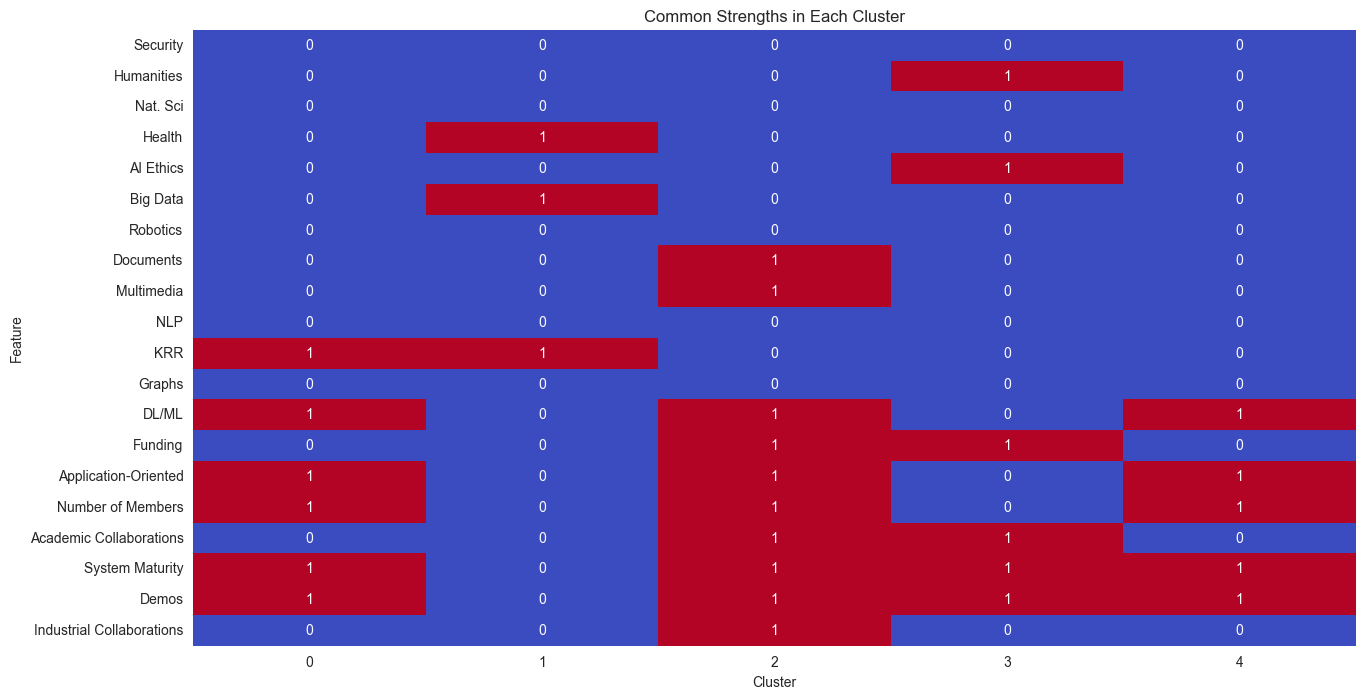

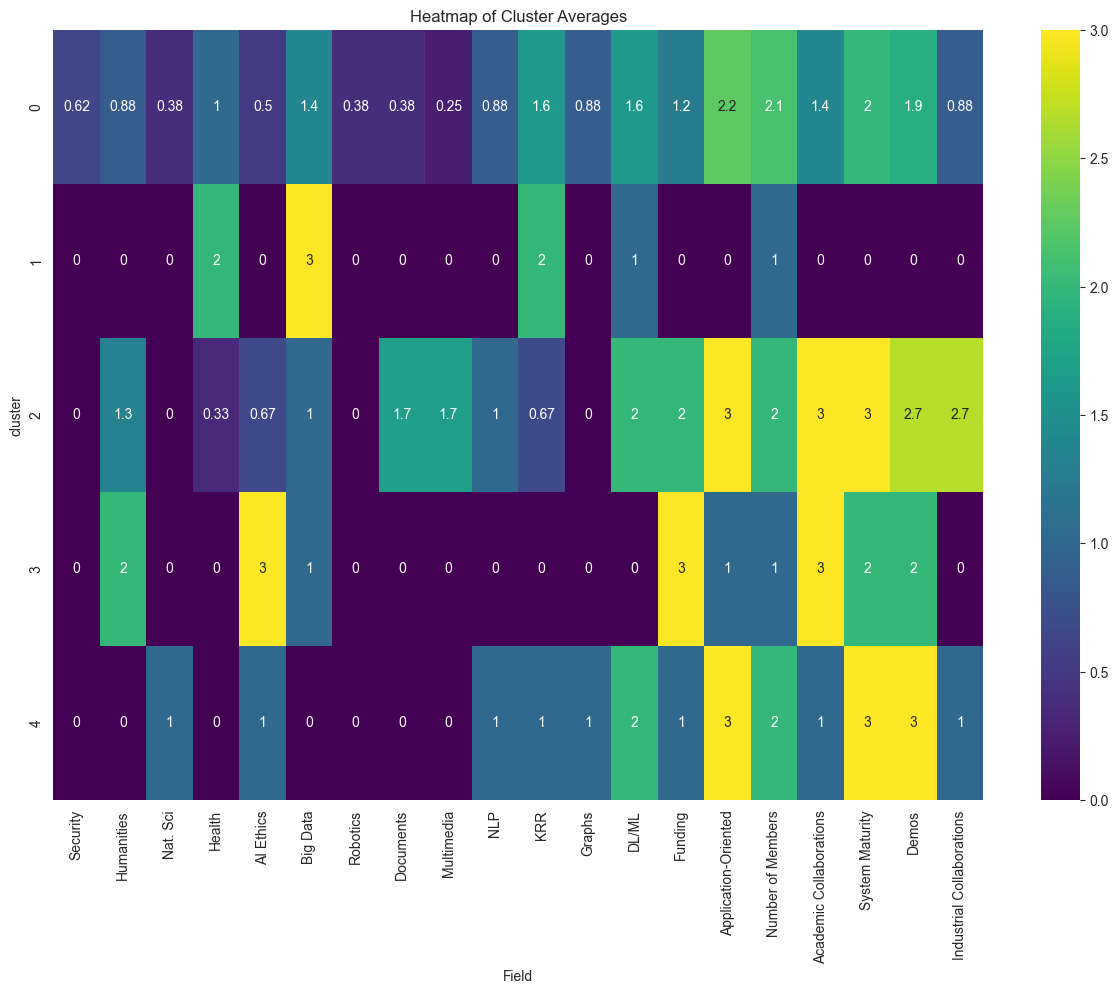

In [52]:
similarity_visual(combined_scores)

In [53]:
# Generate profiles for each cluster
def profile_clusters(df):
    """
    Generates statistical profiles for each cluster.

    This function groups the DataFrame by the 'cluster' column and calculates
    the mean, standard deviation, minimum, and maximum for each feature within
    each cluster.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data, including a 'cluster' column.

    Returns:
    - profiles (DataFrame): A DataFrame with the mean, standard deviation, minimum, and maximum
                            values for each feature within each cluster.
    """
    
    #Group the DataFrame by the 'cluster' column and calculate statistical profiles
    profiles = df.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
    return profiles

cluster_profiles = profile_clusters(df)
print("Cluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
Field   Security                    Humanities                     Nat. Sci  \
            mean      std  min  max       mean       std  min  max     mean   
cluster                                                                       
0          0.625  1.06066  0.0  3.0   0.875000  1.246423  0.0  3.0    0.375   
1          0.000      NaN  0.0  0.0   0.000000       NaN  0.0  0.0    0.000   
2          0.000  0.00000  0.0  0.0   1.333333  0.577350  1.0  2.0    0.000   
3          0.000      NaN  0.0  0.0   2.000000       NaN  2.0  2.0    0.000   
4          0.000      NaN  0.0  0.0   0.000000       NaN  0.0  0.0    1.000   

Field              ... System Maturity          Demos                     \
              std  ...             min  max      mean      std  min  max   
cluster            ...                                                     
0        0.744024  ...             1.0  3.0  1.875000  0.64087  1.0  3.0   
1             NaN  ...             0.0  0.0  

In [54]:
# Clustering using only industry similarity
num_clusters = 5
industry_labels = apply_clustering(industry_scores, num_clusters)
df['industry_cluster'] = industry_labels

# Clustering using only complementary scores
complementary_labels = apply_clustering(complementary_scores, num_clusters)
df['complementary_cluster'] = complementary_labels

# Calculate and compare cluster averages for different methods
industry_cluster_averages = calculate_cluster_averages(df, industry_labels)
complementary_cluster_averages = calculate_cluster_averages(df, complementary_labels)


In [55]:
print("Industry-based Cluster Averages:")
print(industry_cluster_averages)

print("Complementary-based Cluster Averages:")
print(complementary_cluster_averages)


Industry-based Cluster Averages:
Field    Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
cluster                                                                
0        0.000000    2.000000  0.000000     0.0   1.000000  0.000000   
1        0.555556    0.777778  0.333333     1.0   0.444444  1.555556   
2        0.000000    0.000000  1.000000     0.0   1.000000  0.000000   
3        0.000000    2.000000  0.000000     0.0   3.000000  1.000000   
4        0.000000    0.000000  0.000000     2.0   0.000000  3.000000   

Field    Robotics  Documents  Multimedia       NLP  ...     DL/ML   Funding  \
cluster                                             ...                       
0             1.5   1.500000    1.000000  0.000000  ...  1.000000  0.000000   
1             0.0   0.555556    0.555556  1.111111  ...  1.888889  1.777778   
2             0.0   0.000000    0.000000  1.000000  ...  2.000000  1.000000   
3             0.0   0.000000    0.000000  0.000000  ...  0.000000  

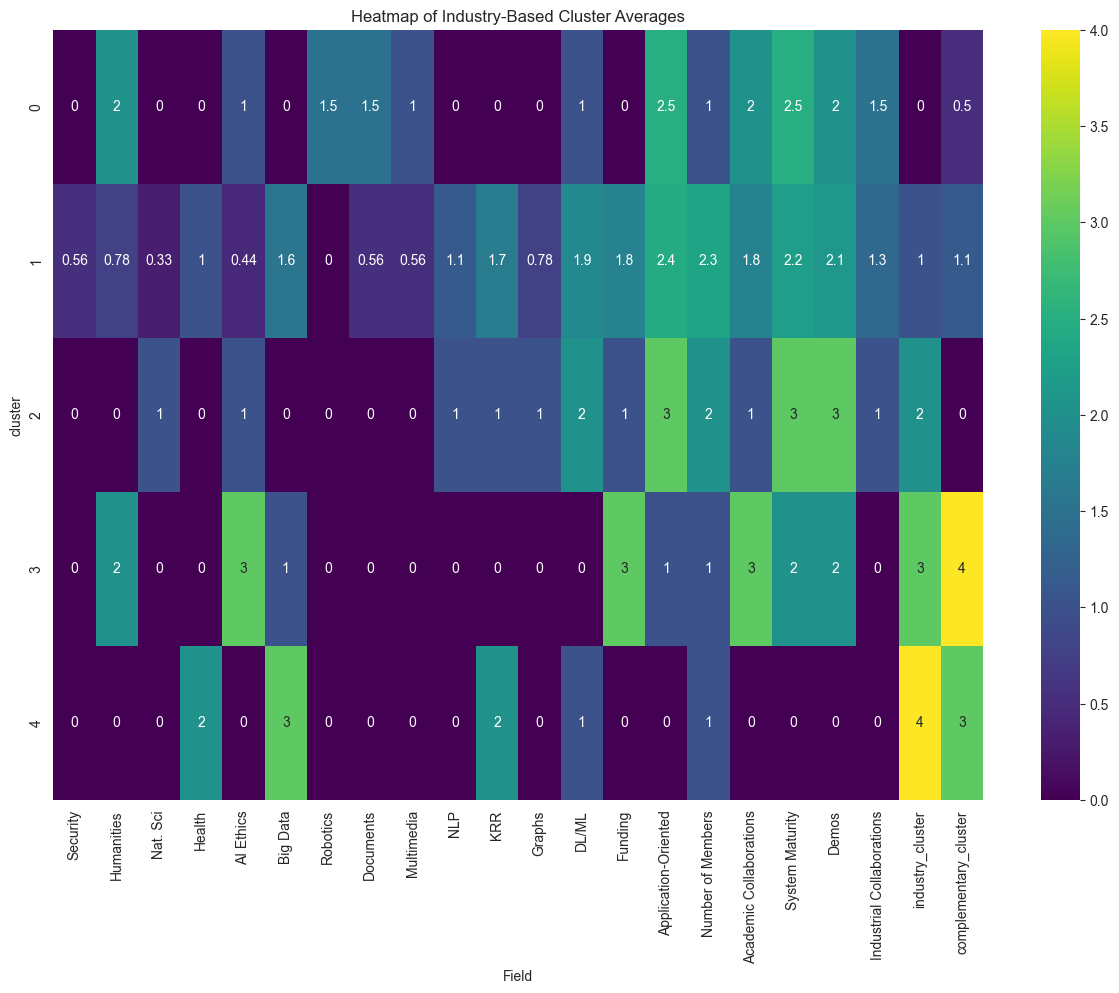

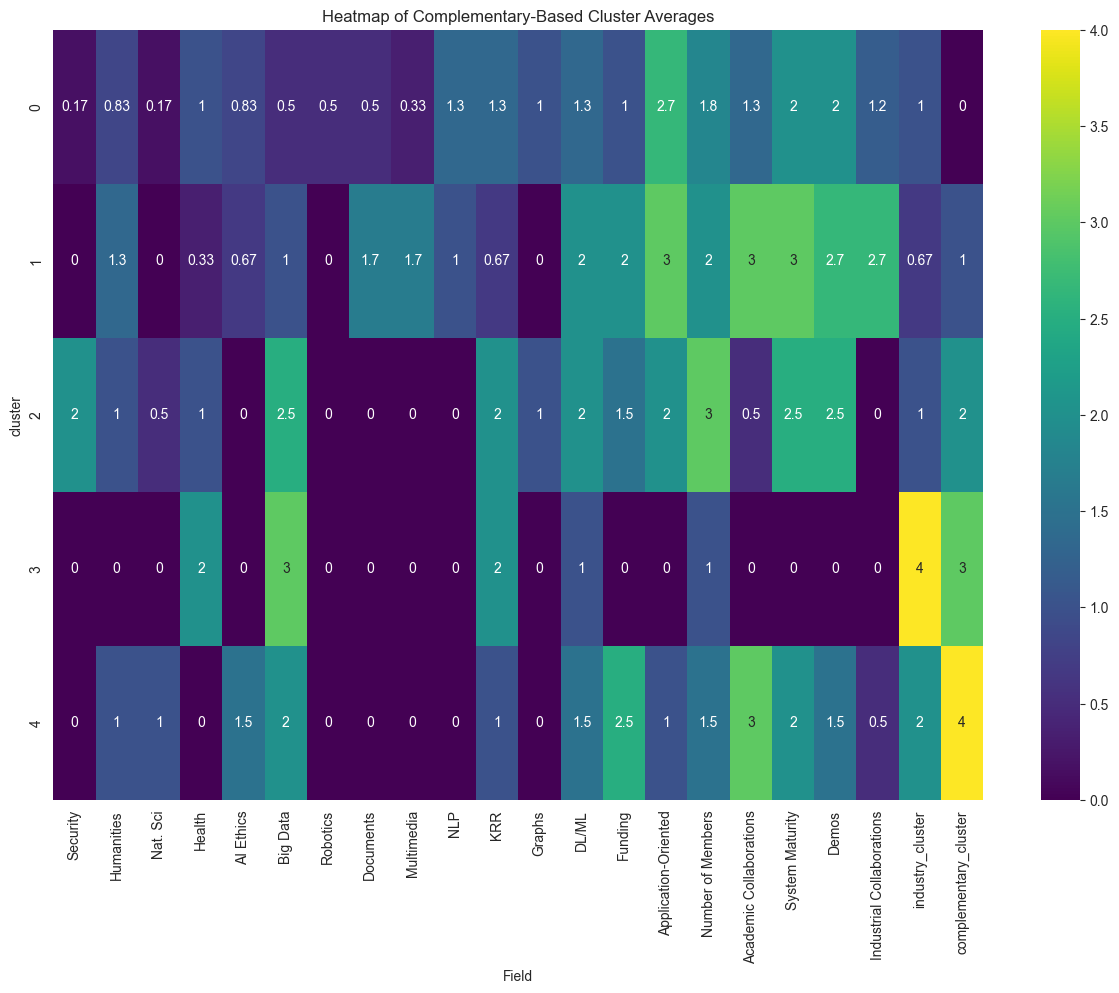

In [56]:
# Visualization of industry-based cluster averages
plt.figure(figsize=(15, 10))
sns.heatmap(industry_cluster_averages, annot=True, cmap='viridis')
plt.title('Heatmap of Industry-Based Cluster Averages')
plt.show()

# Visualization of complementary-based cluster averages
plt.figure(figsize=(15, 10))
sns.heatmap(complementary_cluster_averages, annot=True, cmap='viridis')
plt.title('Heatmap of Complementary-Based Cluster Averages')
plt.show()

In [33]:
# Compare common strengths
industry_common_strengths = identify_common_strengths(industry_cluster_averages)
complementary_common_strengths = identify_common_strengths(complementary_cluster_averages)

print("Industry-based Common Strengths:")
print(industry_common_strengths)

print("Complementary-based Common Strengths:")
print(complementary_common_strengths)

Industry-based Common Strengths:
Field    Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
cluster                                                                
0           False        True     False   False      False     False   
1           False       False     False   False      False      True   
2           False       False     False   False      False     False   
3           False        True     False   False       True     False   
4           False       False     False    True      False      True   

Field    Robotics  Documents  Multimedia    NLP  ...  DL/ML  Funding  \
cluster                                          ...                   
0            True       True       False  False  ...  False    False   
1           False      False       False  False  ...   True     True   
2           False      False       False  False  ...   True    False   
3           False      False       False  False  ...  False     True   
4           False      False  

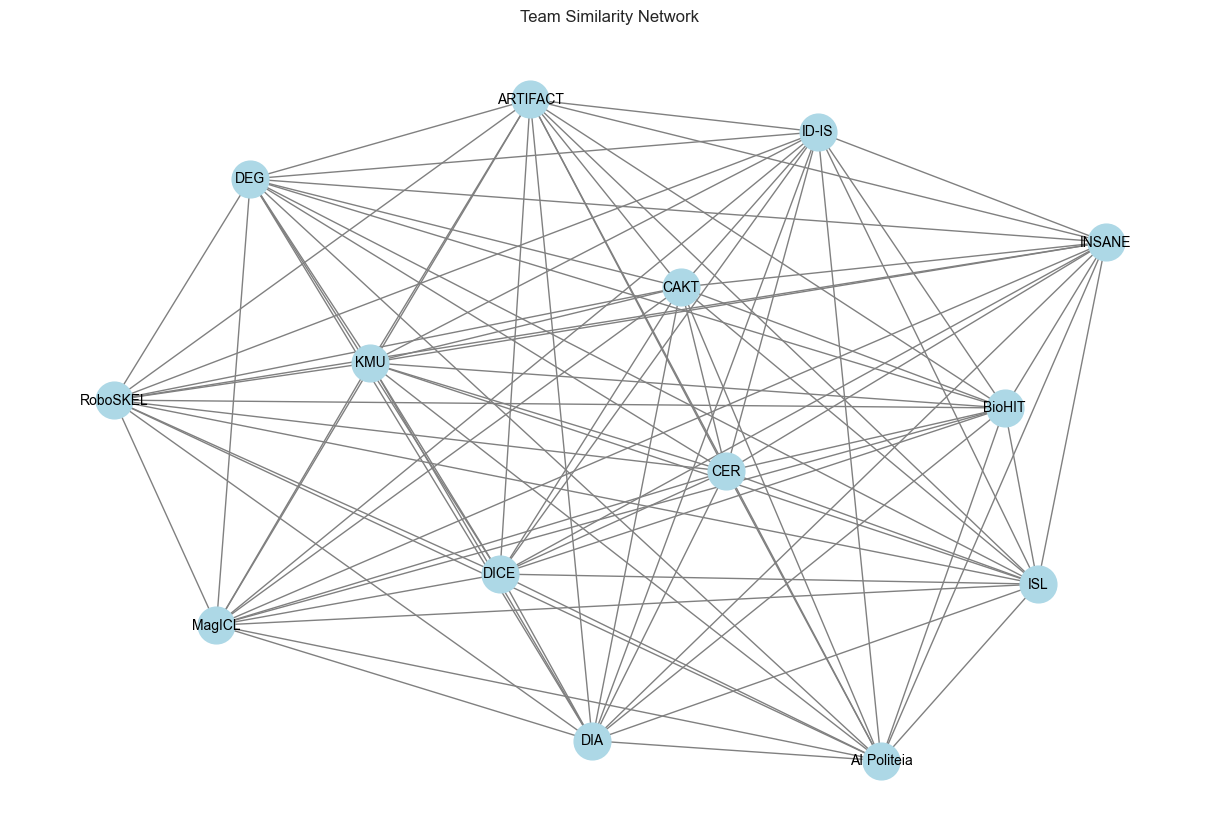

In [229]:
#Network Analysis
    #Nodes---> Team
    #Edges--->Similarities/Potential merges

import networkx as nx

import matplotlib.pyplot as plt

"""
    Plots a network graph representing the similarity between teams.

    This function creates a network graph where each node represents a team, and each edge
    represents the similarity between two teams. Only edges with positive similarity values
    are included.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data. The index should contain team names.
    - similarity_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.

    Returns:
    - None
    """
# Create a team similarity network

def plot_team_network(df, similarity_matrix):
    G = nx.Graph()
    
    # Add nodes
    for team in df.index:
        G.add_node(team)
    
    # Add edges
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if similarity_matrix[i, j] > 0:  # Only add edges with positive similarity
                G.add_edge(df.index[i], df.index[j], weight=similarity_matrix[i, j])
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title('Team Similarity Network')
    plt.show()

# Main execution for network analysis
plot_team_network(df, industry_scores)


In [240]:
def rule_based_similarity(data):
    """
    Calculates a pairwise similarity matrix for the teams based on explicit rules for industry involvement levels.
    
    Parameters:
    - data (DataFrame): The DataFrame containing the team activity data.
    
    Returns:
    - sim_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.
    """
    # List of columns representing industry involvement levels
    industry_cols = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                     'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']
    
    # Initialize a similarity matrix with zeros
    sim_matrix = np.zeros((len(data), len(data)))
    
    # Define rules for similarity scores
    rules = {
        'None-None': 1, 'None-Average': 0, 'None-Good': 0, 'None-Strong': 0,
        'Average-None': 0, 'Average-Average': 2, 'Average-Good': 1, 'Average-Strong': 0,
        'Good-None': 0, 'Good-Average': 1, 'Good-Good': 3, 'Good-Strong': 2,
        'Strong-None': 0, 'Strong-Average': 0, 'Strong-Good': 2, 'Strong-Strong': 4
    }
    
    # Map involvement levels to their labels
    involvement_labels = {0: 'None', 1: 'Average', 2: 'Good', 3: 'Strong'}
    
    # Calculate pairwise similarity scores based on rules
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                similarity_score = 0
                for col in industry_cols:
                    level_i = involvement_labels[data[col].iloc[i]]
                    level_j = involvement_labels[data[col].iloc[j]]
                    rule_key = f"{level_i}-{level_j}"
                    similarity_score += rules.get(rule_key, 0)
                sim_matrix[i][j] = similarity_score
    
    return sim_matrix


In [242]:
rule_based_scores = rule_based_similarity(df)
rule_based_scores

array([[ 0.,  9., 15., 17., 12., 10., 11.,  5.,  7.,  7., 10., 11., 10.,
         7.],
       [ 9.,  0.,  9.,  9.,  8., 11.,  6.,  8., 10.,  8.,  6.,  8.,  9.,
         8.],
       [15.,  9.,  0., 12., 14.,  5., 15.,  5.,  6.,  5., 11., 11., 13.,
        10.],
       [17.,  9., 12.,  0., 11.,  8.,  9.,  9., 10., 11.,  8., 14., 10.,
         9.],
       [12.,  8., 14., 11.,  0.,  4., 12.,  4.,  5.,  6.,  7., 16., 16.,
         7.],
       [10., 11.,  5.,  8.,  4.,  0.,  7., 12., 10., 12.,  5.,  6.,  8.,
        10.],
       [11.,  6., 15.,  9., 12.,  7.,  0.,  7.,  5.,  8.,  8.,  9., 14.,
         8.],
       [ 5.,  8.,  5.,  9.,  4., 12.,  7.,  0., 13., 12.,  7.,  6.,  8.,
        10.],
       [ 7., 10.,  6., 10.,  5., 10.,  5., 13.,  0., 12.,  5.,  7.,  7.,
        10.],
       [ 7.,  8.,  5., 11.,  6., 12.,  8., 12., 12.,  0.,  7.,  9.,  9.,
         8.],
       [10.,  6., 11.,  8.,  7.,  5.,  8.,  7.,  5.,  7.,  0., 10.,  7.,
         9.],
       [11.,  8., 11., 14., 16.,  6.,  9., 

In [58]:
"""""
    Train a supervised learning model
    
    After clustering, assign cluster labels as initial labels to the data.
    Use labels to train a supervised learning model (Random Forrest Classifier) to predict these labels on new data
    
    
    
 """
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [64]:
# Define the features (X) and labels (y)
involvement_columns = [
    'Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
    'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 
    'Funding', 'Application-Oriented', 'Number of Members', 
    'Academic Collaborations', 'System Maturity', 'Demos', 'Industrial Collaborations'
]

X = df[involvement_columns]
y = df['industry_cluster']  # Using industry-based cluster labels as target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Apply clustering on combined similarity scores
num_clusters = 5  # Define the number of clusters
combined_labels = apply_clustering(combined_scores, num_clusters)
df['combined_cluster'] = combined_labels


In [83]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Print the classification report with zero_division parameter set to handle undefined metrics
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [84]:
# Print the accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [85]:
print(df['combined_cluster'].value_counts())

combined_cluster
0    9
2    4
1    1
Name: count, dtype: int64


Feature Importance:
                      Feature  Importance
4                   AI Ethics    0.194455
14       Application-Oriented    0.142544
12                      DL/ML    0.131344
15          Number of Members    0.129762
19  Industrial Collaborations    0.094267
1                  Humanities    0.085526
13                    Funding    0.055044
17            System Maturity    0.033114
5                    Big Data    0.027647
10                        KRR    0.023073
16    Academic Collaborations    0.021930
3                      Health    0.017544
9                         NLP    0.015789
0                    Security    0.013158
6                    Robotics    0.009868
8                  Multimedia    0.004934
11                     Graphs    0.000000
7                   Documents    0.000000
2                    Nat. Sci    0.000000
18                      Demos    0.000000


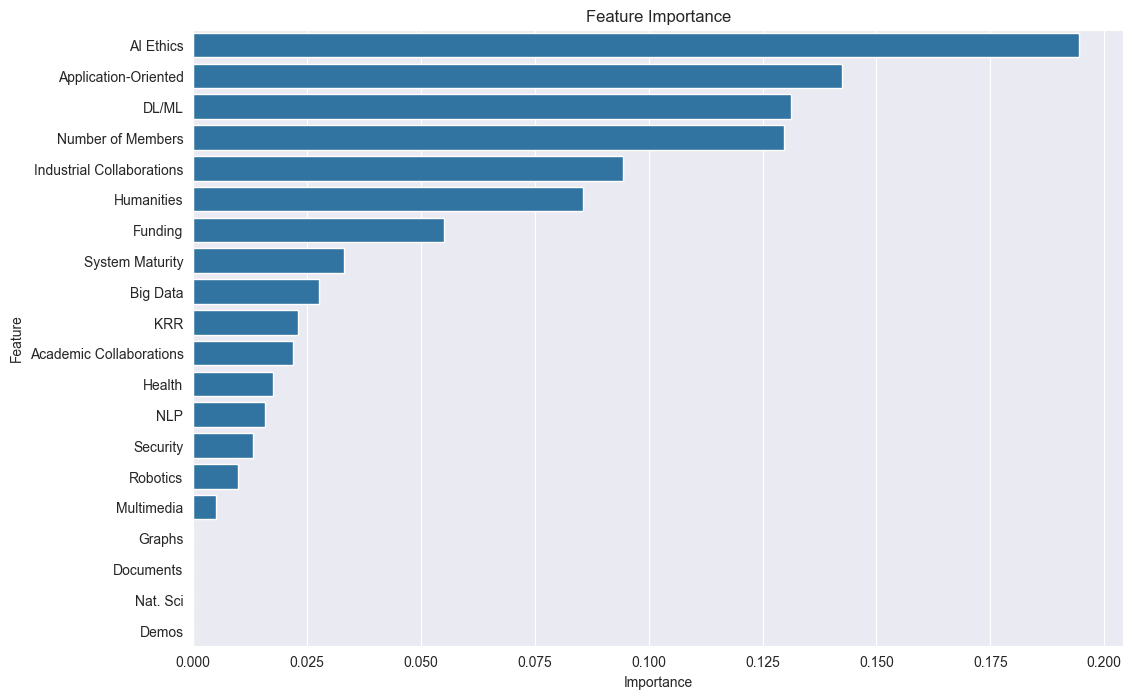

In [87]:
# Analyze the feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': involvement_columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Visualize the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()